In [42]:
import numpy as np
from scipy.stats import norm
import pylab as pl
import numpy.random
import matplotlib.pyplot as plt
from math import sqrt

In [43]:
%matplotlib notebook

In [44]:
def force(M1,M2,R):
    G=6.67384*10**(-11.0)
    return M1*M2*G/(R**2)

In [45]:
def squares(M1, delta_M1, M2, delta_M2, R, delta_R): 
    G=6.67384*10**(-11.0)
    return force(M1,M2,R), sqrt((G*M1*delta_M2/(R**2))**2 + (G*M2*delta_M1/(R**2))**2 + (G*M1*M2*(-2)*delta_R/(R**3))**2)

In [46]:
def MonteKarlo(M1, delta_M1, M2, delta_M2, R, delta_R, distribution):
    n=10**6
    if distribution=='normal':
        l_M1=np.random.normal(M1, delta_M1, size=n)
        l_M2=np.random.normal(M2, delta_M2, size=n)
        l_R=np.random.normal(R, delta_R, size=n)
    elif distribution=='uniform':
        l_M1=np.random.uniform(M1-delta_M1, M1+delta_M1, size=n)
        l_M2=np.random.uniform(M2-delta_M2, M2+delta_M2, size=n)
        l_R=np.random.uniform(R-delta_R, R+delta_R, size=n)
    else:
        print('Error: "uniform" or "normal" expected as distribution')
        return
    Force=force(l_M1, l_M2, l_R)
    plt.hist(Force, bins=100, normed = True)
    print(Force)
    a, b = norm.fit(force(l_M1,l_M2,l_R))
    Min,Max=plt.xlim()
    plt.plot(np.linspace(Min, Max, 100), norm.pdf(np.linspace(Min, Max, 100), a, b))

In [47]:
n=10**6
M1=40*10**4
M2=30*10**4
R=3.2
delta_R=0.01
delta_M1=0.05*10**4
delta_M2=0.1*10**4

In [48]:
result, error=squares(M1, delta_M1, M2, delta_M2, R, delta_R)
print('F=', result, '+-', error, 'Н')

F= 0.7820906249999999 +- 0.005625407272639264 Н


<IPython.core.display.Javascript object>


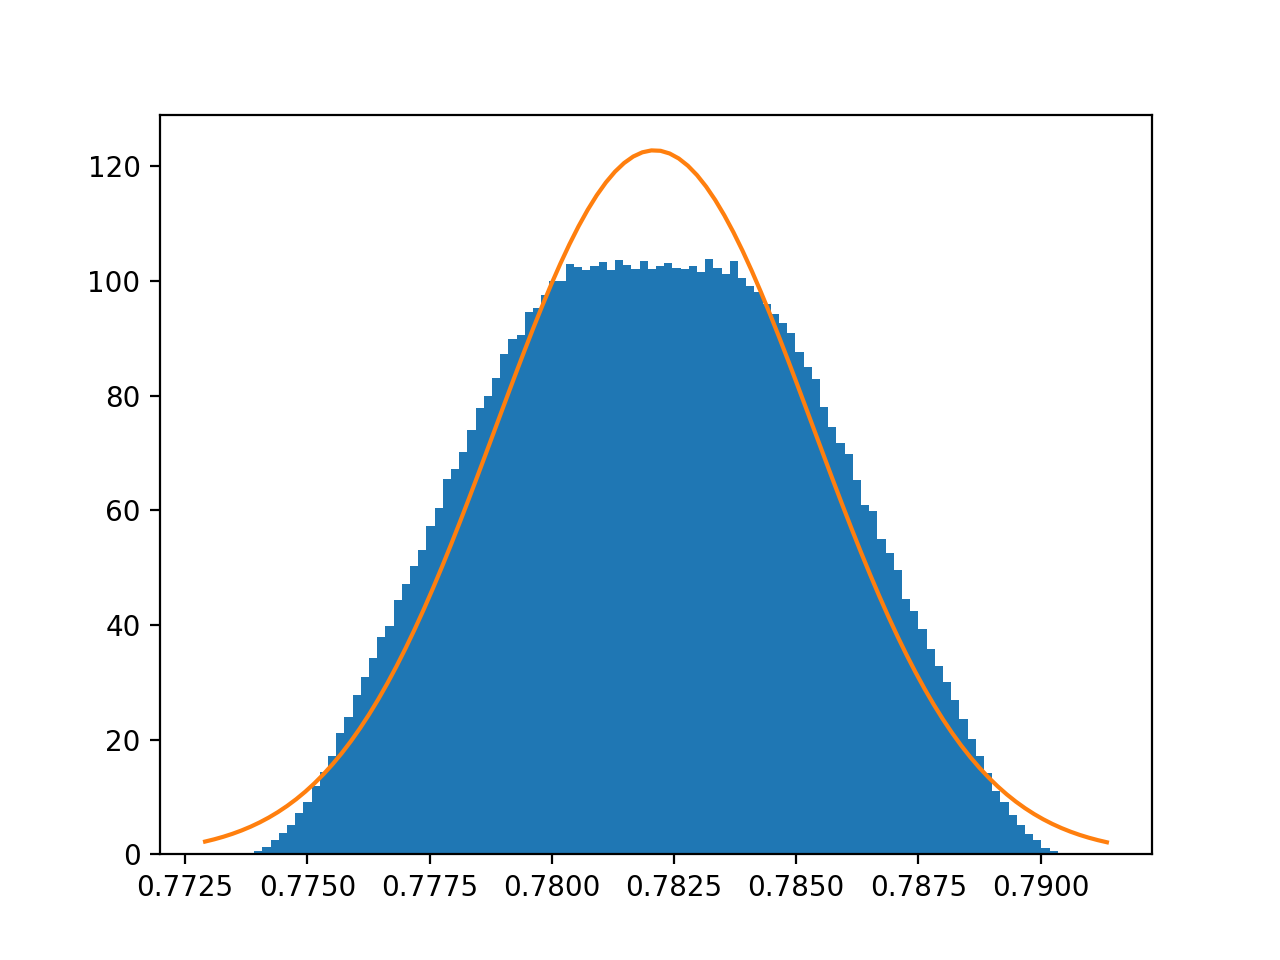

[0.78133511 0.77756104 0.78520478 ... 0.78120774 0.78165127 0.78447226]


In [49]:
MonteKarlo(M1, delta_M1, M2, delta_M2, R, delta_R, 'uniform')

<IPython.core.display.Javascript object>


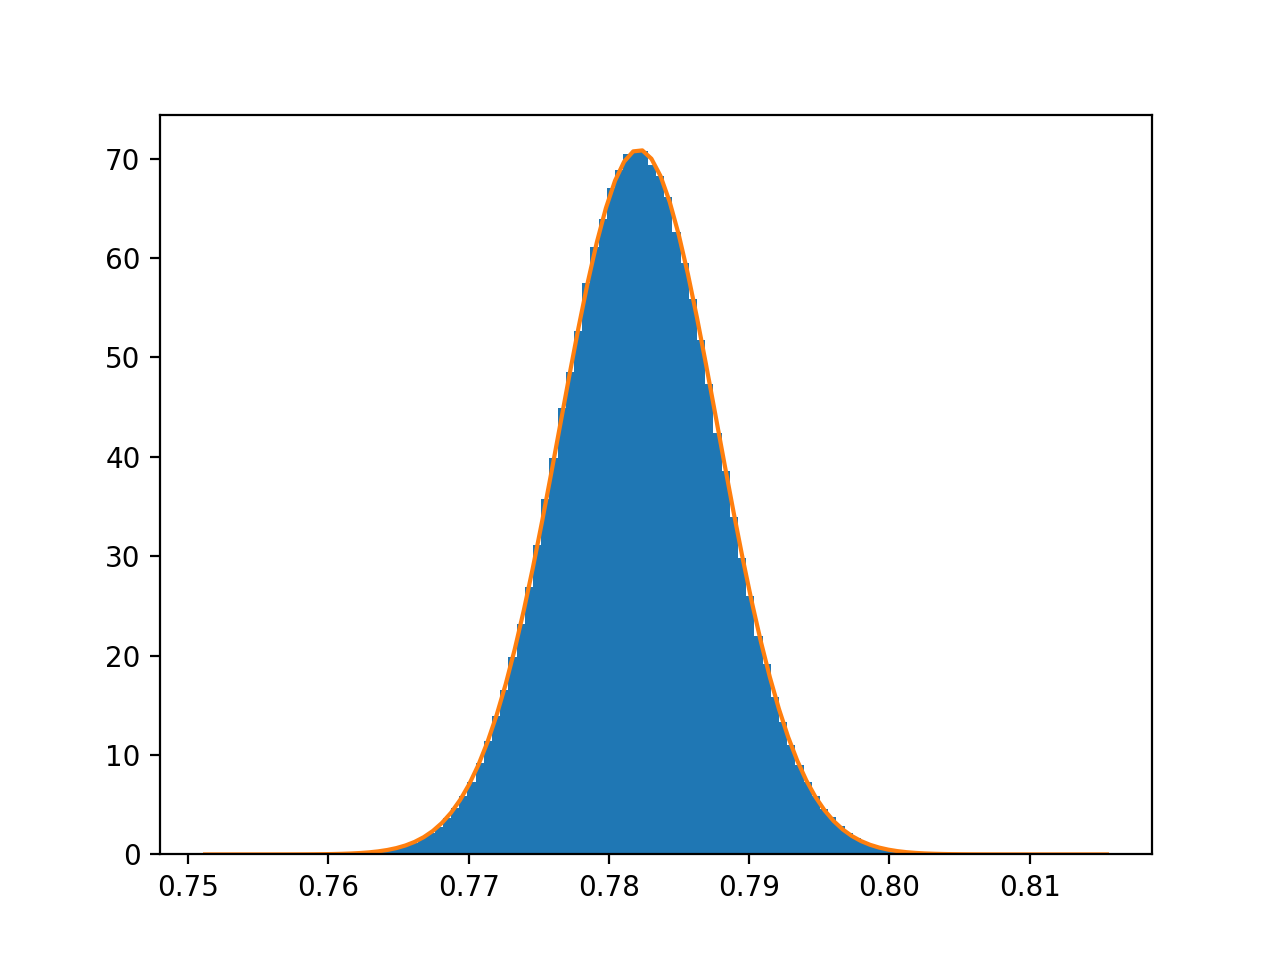

[0.77448533 0.78334521 0.77509565 ... 0.78683088 0.77688384 0.7747429 ]


In [50]:
MonteKarlo(M1, delta_M1, M2, delta_M2, R, delta_R, 'normal')